<a href="https://colab.research.google.com/github/pratishta/outdoor_dining_and_covid_spatial_summary/blob/main/data_clean_up_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!apt install python3-rtree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-rtree is already the newest version (0.9.7-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [51]:
# !pip install pysal

In [52]:
# !pip install mapclassify

In [53]:
# !pip install geopandas

In [54]:
# !pip install splot

In [55]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import pysal
import mapclassify
import requests
import numpy as np
from zipfile import ZipFile

<ipython-input-55-7e72af5b0e9c>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


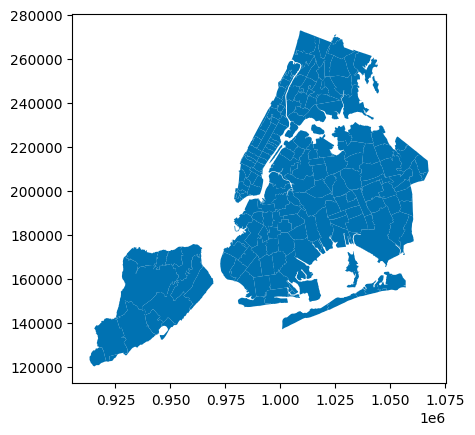

In [56]:
nyc = gpd.read_file('https://github.com/nychealth/coronavirus-data/raw/a8760aa583cfd57b7d58274ade802259b64f2894/Geography-resources/MODZCTA_2010.shp')

nyc.plot();

In [57]:
nyc.crs

<Projected CRS: PROJCS["Lambert_Conformal_Conic",GEOGCS["NAD83",DA ...>
Name: Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [58]:
# really should combine the shapefile in GEODA or something or maybe even here through pandas before doing the weights analysis
nyc.rename(columns={"MODZCTA": "modzcta"}, inplace=True)
nyc.head()

,modzcta,label,geometry
0,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21..."
1,10002,10002,"POLYGON ((985342.000 197658.000, 985336.000 19..."
2,10003,10003,"POLYGON ((987412.000 202684.000, 987400.000 20..."
3,10004,10004,"MULTIPOLYGON (((982030.000 197212.000, 981958...."
4,10005,10005,"POLYGON ((982126.000 195468.000, 982080.000 19..."


In [59]:
import libpysal
w = libpysal.weights.Queen.from_dataframe(nyc)

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 37.
  warnings.warn(message)


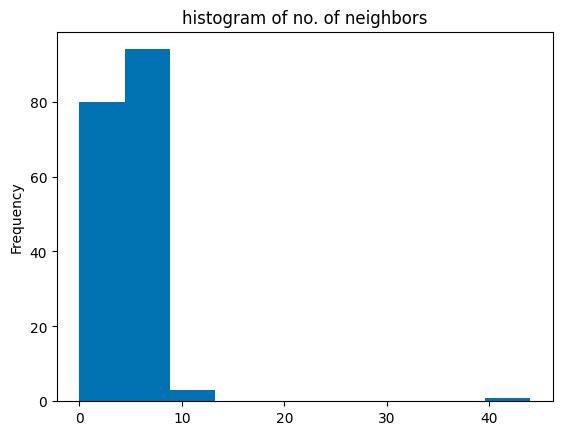

In [60]:
cardinalities = pd.Series(w.cardinalities)
cardinalities.plot(kind='hist', title='histogram of no. of neighbors');

In [61]:
nyc['modzcta']=nyc['modzcta'].astype(int)
nyc.dtypes

modzcta        int64
label         object
geometry    geometry
dtype: object

In [62]:
# getting the coronavirus data
data_url = "https://raw.githubusercontent.com/nychealth/coronavirus-data/81b8825ce37c7eef686578486e20c02641daa9bb/totals/data-by-modzcta.csv"
covid_data = pd.read_csv(data_url)
covid_data.rename(columns={"MODIFIED_ZCTA": "modzcta"}, inplace=True)
covid_data.head()

,modzcta,NEIGHBORHOOD_NAME,BOROUGH_GROUP,label,lat,lon,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",40.750693,-73.997137,1447,5240.27,27613.09,32,115.89,7.68,19303
1,10002,Chinatown/Lower East Side,Manhattan,10002,40.715781,-73.986176,5515,7321.83,75322.71,253,335.89,12.25,46247
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,10003,40.731825,-73.989164,2623,4859.40,53977.81,47,87.07,6.64,40171
3,10004,Financial District,Manhattan,10004,40.703675,-74.013106,238,8007.76,2972.12,2,67.29,6.79,3533
4,10005,Financial District,Manhattan,10005,40.706092,-74.008861,383,4373.53,8757.23,0,0.00,6.43,5910


In [63]:

c = pd.DataFrame(covid_data.columns)
c.to_csv('covid_cols.csv')

In [64]:
!pip install sodapy
from sodapy import Socrata

In [65]:
client = Socrata("data.cityofnewyork.us", None)
results = client.get("pitm-atqc", limit=20000)

# Convert to pandas DataFrame
restaurant_data = pd.DataFrame.from_records(results)
restaurant_data.describe()

,objectid,globalid,seating_interest_sidewalk,restaurant_name,legal_business_name,doing_business_as_dba,bulding_number,street,borough,zip,...,community_board,council_district,census_tract,bin,bbl,nta,roadway_dimensions_length,roadway_dimensions_width,roadway_dimensions_area,landmarkdistrict_terms
count,14428,14428,14428,14428,14428,14428,12776,14428,14428,14428,...,13121,13121,13121,13026,13026,13121,9054,9054,9054,2129
unique,14421,14425,4,11673,12464,12035,4315,7545,5,246,...,19,51,889,8959,8851,186,174,45,406,1
top,7066,{590A6C15-466C-4B8E-811F-DDFC754591A4},both,PRET A MANGER,SWEETGREEN NEW YORK LLC,PRET A MANGER,undefined,Broadway,Manhattan,10003,...,2,3,38,3000000,3001497501,West Village,20,8,160,yes
freq,2,2,7109,43,31,42,2232,282,7179,612,...,1953,1583,195,29,18,778,965,7189,781,2129


In [66]:
# restaurant_url = "https://data.cityofnewyork.us/resource/pitm-atqc.json"
# restaurant_data = pd.read_csv('Open_Restaurant_Applications.csv')

# restaurant_data.head()

In [67]:
r = pd.DataFrame(restaurant_data.columns)
r.to_csv('restaurant_cols.csv')

In [68]:
r


,0
0,objectid
1,globalid
2,seating_interest_sidewalk
3,restaurant_name
4,legal_business_name
5,doing_business_as_dba
6,bulding_number
7,street
8,borough
9,zip


In [70]:
# convert open restaurant data into geodataframe

restaurant_geodf = gpd.GeoDataFrame(
   restaurant_data, geometry=gpd.points_from_xy(restaurant_data.longitude, restaurant_data.latitude))

restaurant_geodf.head()

,objectid,globalid,seating_interest_sidewalk,restaurant_name,legal_business_name,doing_business_as_dba,bulding_number,street,borough,zip,...,council_district,census_tract,bin,bbl,nta,roadway_dimensions_length,roadway_dimensions_width,roadway_dimensions_area,landmarkdistrict_terms,geometry
0,100,c4b3155b-31a0-4e95-846f-fce09f245437,sidewalk,Pomp and Circumstance Hospitality,Pomp and Circumstance Hospitality LLC,Pomp and Circumstance Hospitality LLC,577,Lorimer Street,Brooklyn,11211,...,34,501,3068653,3027560028,East Williamsburg,NaN,NaN,NaN,NaN,POINT (-73.94942 40.71426)
1,1000,753495d8-4429-43e5-85a3-dcf6230ef749,both,Charm Kao,193 Schemerhorn INC,Charm Kao,193,Schermerhorn St.,Brooklyn,11201,...,33,37,3000493,3001640041,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,24,8,192,NaN,POINT (-73.98635 40.68911)
2,10000,{3842B5C5-EF04-41A4-8216-D6EA627DCE5E},openstreets,SAKE BAR HAGI 46,"HAMA NEW YORK, INC.",SAKE BAR HAGI 46,358,W. 46TH STREET,Manhattan,10036,...,3,121,1025025,1010360057,Clinton,NaN,NaN,NaN,NaN,POINT (-73.98953 40.76046)
3,10001,{C212A0FC-C115-4425-8F95-931B12C5F86A},openstreets,Yum yum too,Boythaicorp,Boythaicorp,662,9ave,Manhattan,10036,...,3,127,1025038,1010370001,Clinton,NaN,NaN,NaN,NaN,POINT (-73.99068 40.76108)
4,10002,{DA48265D-7730-416F-8E1C-EBC8C8ACE2C2},openstreets,Xochil Pizza Corp,Xochil Pizza Corp,Xochil Pizza Corp,4632,5th Avenue,Brooklyn,11220,...,38,80,NaN,NaN,Sunset Park West,NaN,NaN,NaN,NaN,POINT (-74.00822 40.64714)


In [71]:
covid_geodata = nyc.merge(covid_data, on='modzcta', how='left')

In [72]:
covid_geodata.head()

,modzcta,label_x,geometry,NEIGHBORHOOD_NAME,BOROUGH_GROUP,label_y,lat,lon,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21...",Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",40.750693,-73.997137,1447.0,5240.27,27613.09,32.0,115.89,7.68,19303.0
1,10002,10002,"POLYGON ((985342.000 197658.000, 985336.000 19...",Chinatown/Lower East Side,Manhattan,10002,40.715781,-73.986176,5515.0,7321.83,75322.71,253.0,335.89,12.25,46247.0
2,10003,10003,"POLYGON ((987412.000 202684.000, 987400.000 20...",East Village/Gramercy/Greenwich Village,Manhattan,10003,40.731825,-73.989164,2623.0,4859.40,53977.81,47.0,87.07,6.64,40171.0
3,10004,10004,"MULTIPOLYGON (((982030.000 197212.000, 981958....",Financial District,Manhattan,10004,40.703675,-74.013106,238.0,8007.76,2972.12,2.0,67.29,6.79,3533.0
4,10005,10005,"POLYGON ((982126.000 195468.000, 982080.000 19...",Financial District,Manhattan,10005,40.706092,-74.008861,383.0,4373.53,8757.23,0.0,0.00,6.43,5910.0


In [73]:
# set both crs to the same projection (changecovid geodata slightly bc i don't know what the fuck kind of projection it was befor
# but maybe when i find out, i can actually change the restaurant crs to the same thing)
covid_geodata = covid_geodata.to_crs("EPSG:4326")
nyc = nyc.to_crs("EPSG:4326")
restaurant_geodf = restaurant_geodf.set_crs("EPSG:4326")

In [74]:
restaurant_geo = gpd.sjoin(restaurant_geodf, nyc, how="inner", op='intersects')
restaurant_geo.head()

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,objectid,globalid,seating_interest_sidewalk,restaurant_name,legal_business_name,doing_business_as_dba,bulding_number,street,borough,zip,...,bbl,nta,roadway_dimensions_length,roadway_dimensions_width,roadway_dimensions_area,landmarkdistrict_terms,geometry,index_right,modzcta,label
0,100,c4b3155b-31a0-4e95-846f-fce09f245437,sidewalk,Pomp and Circumstance Hospitality,Pomp and Circumstance Hospitality LLC,Pomp and Circumstance Hospitality LLC,577,Lorimer Street,Brooklyn,11211,...,3027560028,East Williamsburg,NaN,NaN,NaN,NaN,POINT (-73.94942 40.71426),98,11211,"11211, 11249"
18,10015,{F26CB212-F0FA-423A-820C-D961862B2589},both,A-Pou's Taste,Cyber LLC,Cyber LLC,963,Grand St,Brooklyn,11211,...,3029240044,East Williamsburg,10,8,80,NaN,POINT (-73.93603 40.71308),98,11211,"11211, 11249"
123,1011,1254d70e-9a6f-46dd-8708-6dfe0d5ed1c0,both,Vinnie's Pizzeria,Rikovi & Sean Ltd,Rikovi & Sean Ltd,148,Bedford Ave,Brooklyn,11249,...,3023110022,North Side-South Side,13,5,65,NaN,POINT (-73.95669 40.71881),98,11211,"11211, 11249"
171,10153,{65ABEFCA-60D0-42B8-8F9B-DA15AE0DDF82},both,Loving Hut,"Loving Hut Williamsburg, Inc.","Loving Hut Williamsburg, Inc.",76,Bushwick Avenue,Brooklyn,11211,...,3027840015,East Williamsburg,24,8,192,NaN,POINT (-73.94098 40.71251),98,11211,"11211, 11249"
213,10191,{16E2E699-0614-43A1-8A1D-73950B7D05AE},roadway,Ako Sushi,New Ako Restaurant Inc,Ako Japanese Cuisine,205,Bedford Ave,Brooklyn,11211,...,3023360004,North Side-South Side,18,8,144,yes,POINT (-73.95856 40.71705),98,11211,"11211, 11249"


<Axes: >

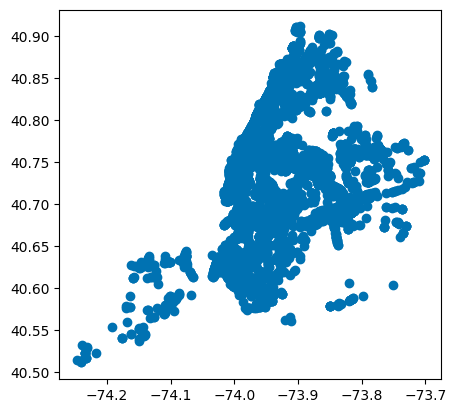

In [75]:
restaurant_geo.plot()

In [76]:
restaurant_geo.describe()

,index_right,modzcta
count,13120.000000,13120.000000
mean,61.886585,10591.269284
std,50.999528,601.278658
min,0.000000,10001.000000
25%,13.000000,10016.000000
50%,49.000000,10306.000000
75%,104.000000,11217.000000
max,176.000000,11697.000000


In [79]:
sideroad_df = restaurant_geo[(restaurant_geo['approved_for_sidewalk_seating'] == "yes") | (restaurant_geo['approved_for_roadway_seating'] == "yes")]
sideroad_df.head(1)

,objectid,globalid,seating_interest_sidewalk,restaurant_name,legal_business_name,doing_business_as_dba,bulding_number,street,borough,zip,...,bbl,nta,roadway_dimensions_length,roadway_dimensions_width,roadway_dimensions_area,landmarkdistrict_terms,geometry,index_right,modzcta,label
0,100,c4b3155b-31a0-4e95-846f-fce09f245437,sidewalk,Pomp and Circumstance Hospitality,Pomp and Circumstance Hospitality LLC,Pomp and Circumstance Hospitality LLC,577,Lorimer Street,Brooklyn,11211,...,3027560028,East Williamsburg,NaN,NaN,NaN,NaN,POINT (-73.94942 40.71426),98,11211,"11211, 11249"


In [80]:
restaurant_count = sideroad_df.groupby(['modzcta']).count()
restaurant_count = restaurant_count.loc[:, restaurant_count.columns.intersection(['modzcta', 'objectid'])]
restaurant_count.rename(columns={"objectid": "open_restaurant_count"}, inplace=True)
restaurant_count.head()

,open_restaurant_count
modzcta,
10001,223
10002,296
10003,555
10004,51
10005,28


In [81]:
restaurant_count.describe()

,open_restaurant_count
count,176.000000
mean,72.704545
std,95.449991
min,1.000000
25%,11.750000
50%,31.500000
75%,97.250000
max,555.000000


In [82]:
# covid-restaurant geo-dataframe
cr_gdf = covid_geodata.merge(restaurant_count, on='modzcta')
cr_gdf.head(20)

,modzcta,label_x,geometry,NEIGHBORHOOD_NAME,BOROUGH_GROUP,label_y,lat,lon,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS,open_restaurant_count
0,10001,"10001, 10118","POLYGON ((-73.98774 40.74407, -73.98819 40.743...",Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",40.750693,-73.997137,1447.0,5240.27,27613.09,32.0,115.89,7.68,19303.0,223
1,10002,10002,"POLYGON ((-73.99606 40.70920, -73.99608 40.709...",Chinatown/Lower East Side,Manhattan,10002,40.715781,-73.986176,5515.0,7321.83,75322.71,253.0,335.89,12.25,46247.0,296
2,10003,10003,"POLYGON ((-73.98859 40.72300, -73.98864 40.722...",East Village/Gramercy/Greenwich Village,Manhattan,10003,40.731825,-73.989164,2623.0,4859.40,53977.81,47.0,87.07,6.64,40171.0,555
3,10004,10004,"MULTIPOLYGON (((-74.00801 40.70798, -74.00827 ...",Financial District,Manhattan,10004,40.703675,-74.013106,238.0,8007.76,2972.12,2.0,67.29,6.79,3533.0,51
4,10005,10005,"POLYGON ((-74.00766 40.70319, -74.00783 40.703...",Financial District,Manhattan,10005,40.706092,-74.008861,383.0,4373.53,8757.23,0.0,0.00,6.43,5910.0,28
5,10006,10006,"POLYGON ((-74.01251 40.70677, -74.01325 40.705...",Financial District,Manhattan,10006,40.709651,-74.013044,156.0,4612.93,3381.80,1.0,29.57,6.71,2369.0,17
6,10007,10007,"POLYGON ((-74.00397 40.71182, -74.00405 40.711...",TriBeCa,Manhattan,10007,40.713923,-74.007546,361.0,5163.45,6991.45,4.0,57.21,5.92,6162.0,47
7,10009,10009,"POLYGON ((-73.97872 40.71998, -73.97875 40.719...",Alphabet City/East Village/Stuyvesant Town-Coo...,Manhattan,10009,40.726380,-73.978704,3369.0,5894.90,57151.12,113.0,197.72,9.10,37655.0,282
8,10010,10010,"POLYGON ((-73.97441 40.73259, -73.97449 40.732...",Flatiron/Gramercy/Kips Bay,Manhattan,10010,40.739119,-73.982544,1602.0,4803.17,33353.00,37.0,110.93,6.01,26944.0,181
9,10011,10011,"POLYGON ((-74.00821 40.74215, -74.00870 40.742...",Chelsea,Manhattan,10011,40.741707,-74.000062,2424.0,4872.76,49745.99,62.0,124.63,7.10,34571.0,315


<Axes: >

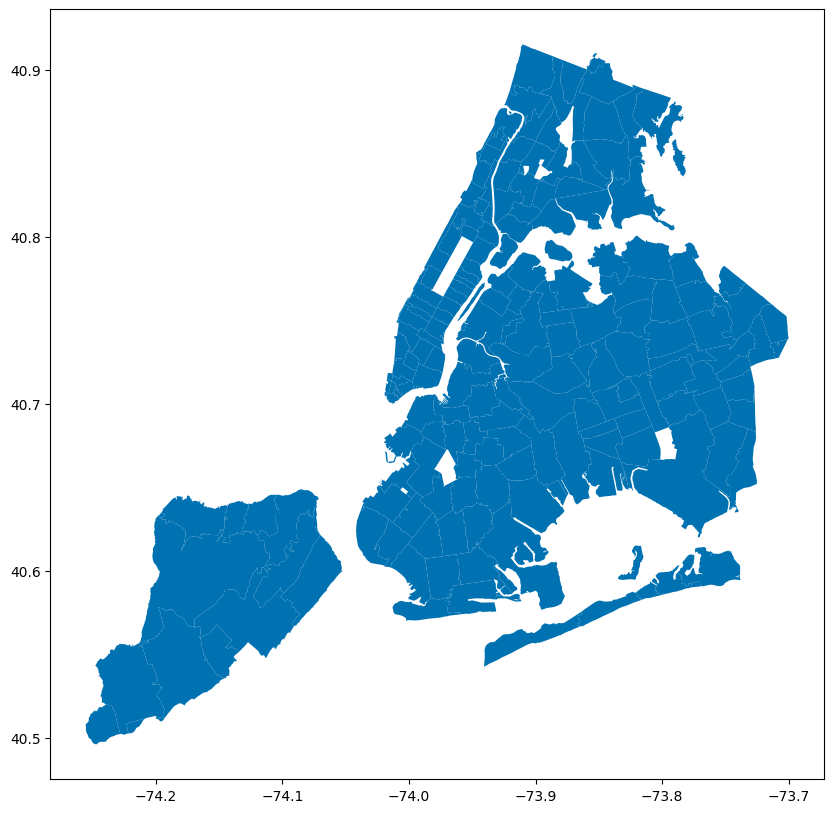

In [83]:
cr_gdf.plot(figsize=(10, 10))

In [84]:
cr_gdf['open_restaurant_count'].describe()

count    176.000000
mean      72.704545
std       95.449991
min        1.000000
25%       11.750000
50%       31.500000
75%       97.250000
max      555.000000
Name: open_restaurant_count, dtype: float64

In [85]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

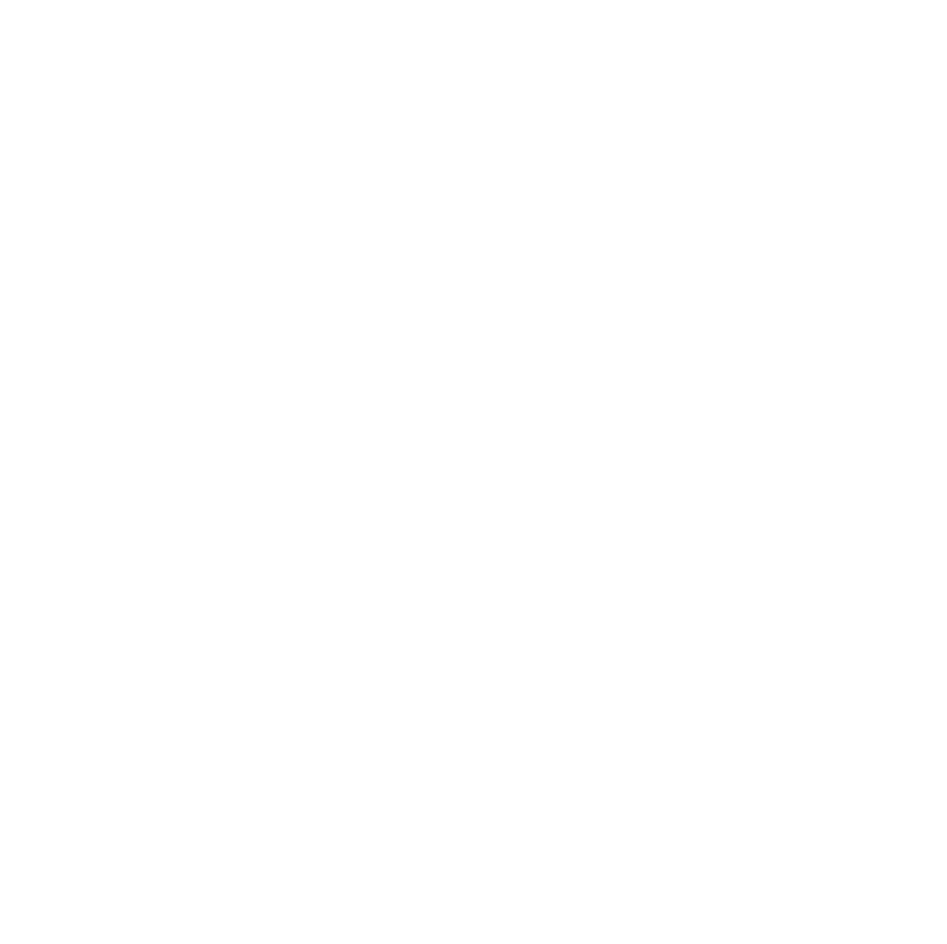

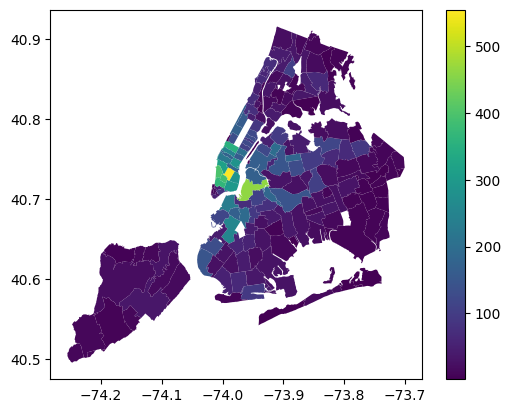

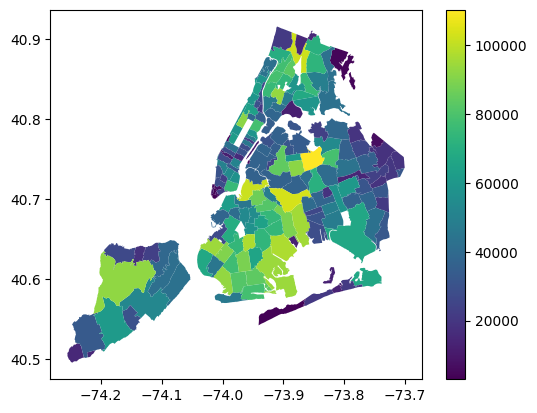

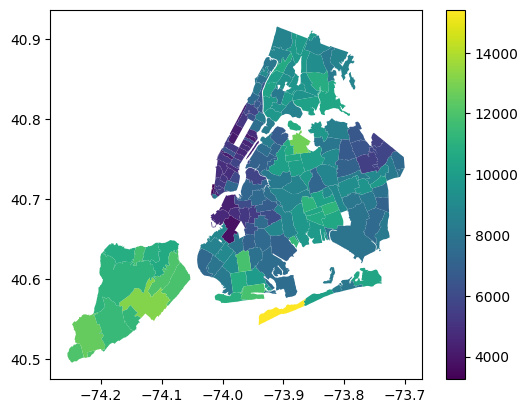

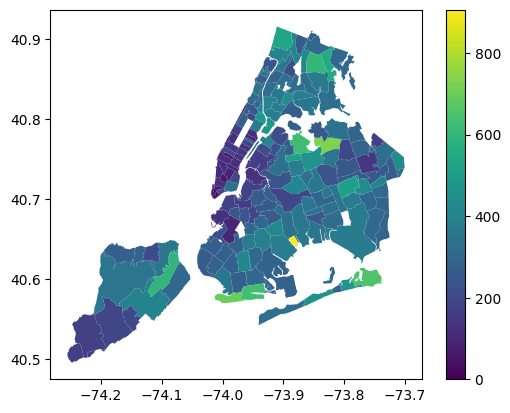

In [86]:
# DESCRIPTIVE STATS MAPS

# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

                    # Subplot 1 #
ax = axs[0]
cr_gdf.plot(legend=True, column='open_restaurant_count')
ax.set_aspect('equal')
ax.set_axis_off()

#                     # Subplot 2 #
ax = axs[1]
cr_gdf.plot(legend=True, column='POP_DENOMINATOR')
ax.set_aspect('equal')
ax.set_axis_off()

#                     # Subplot 3 #
ax = axs[2]
cr_gdf.plot(legend=True, column='COVID_CASE_RATE')
ax.set_aspect('equal')
ax.set_axis_off()

#                     # Subplot 4 #
ax = axs[3]
cr_gdf.plot(legend=True, column='COVID_DEATH_RATE')
ax.set_aspect('equal')
ax.set_axis_off()


# Display the figure
# plt.show()

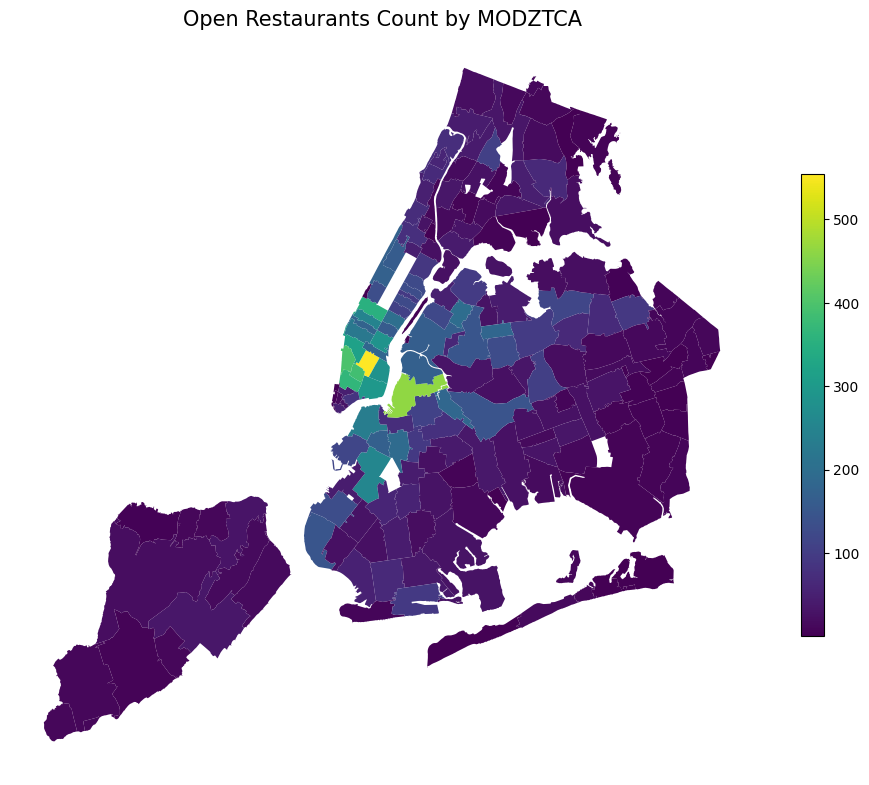

In [87]:
# cr_gdf.plot(figsize=(10, 10), column='open_restaurant_count', legend=True)

# or_ds.axes.get_xaxis().set_visible(False)
# or_ds.axes.get_yaxis().set_visible(False)

# cr_gdf['log_restaurant_count'] = np.log10(cr_gdf['open_restaurant_count'])
op_dr = cr_gdf.plot(figsize=(12, 12), legend=True, column='open_restaurant_count', legend_kwds={'shrink': 0.5})
op_dr.axis("off")
op_dr.set_title('Open Restaurants Count by MODZTCA', fontdict={'fontsize': '15', 'fontweight' : '3'})



plt.show()

Text(0.5, 1.0, 'Population Denominator by MODZTCA')

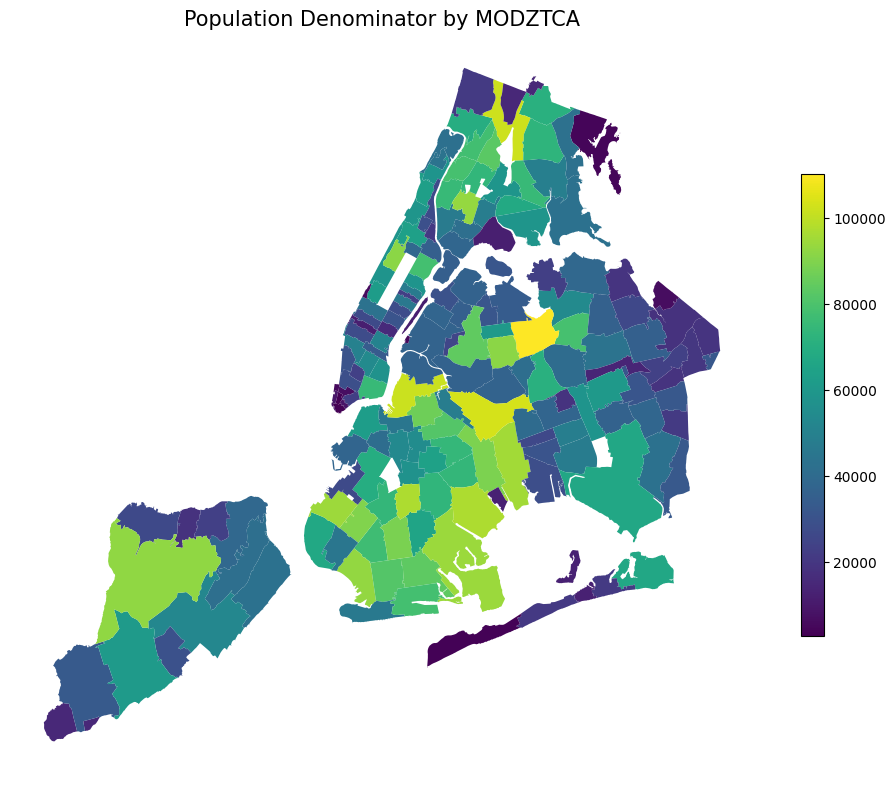

In [88]:
pop_ds = cr_gdf.plot(figsize=(12, 12), legend=True, legend_kwds={'shrink': 0.5}, column='POP_DENOMINATOR')
pop_ds.axis("off")
pop_ds.set_title('Population Denominator by MODZTCA', fontdict={'fontsize': '15', 'fontweight' : '3'})

Text(0.5, 1.0, 'COVID-19 Case Rate by MODZTCA')

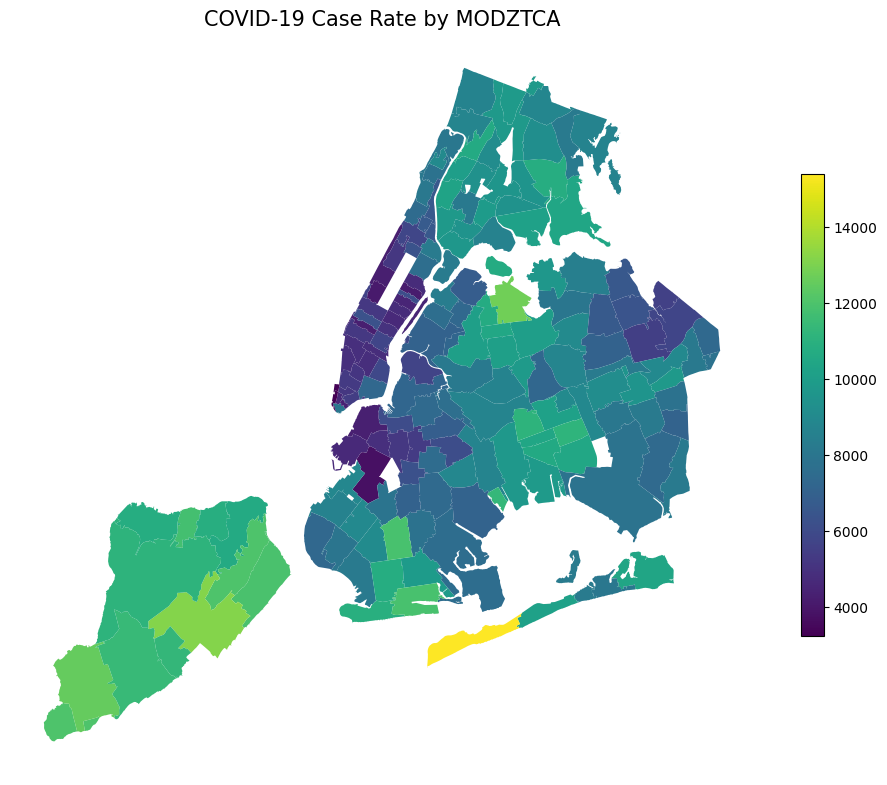

In [89]:
case_r_ds = cr_gdf.plot(figsize=(12, 12), legend=True, legend_kwds={'shrink': 0.5}, column='COVID_CASE_RATE')
case_r_ds.axis("off")
case_r_ds.set_title('COVID-19 Case Rate by MODZTCA', fontdict={'fontsize': '15', 'fontweight' : '3'})

Text(0.5, 1.0, 'COVID-19 Death Rate by MODZTCA')

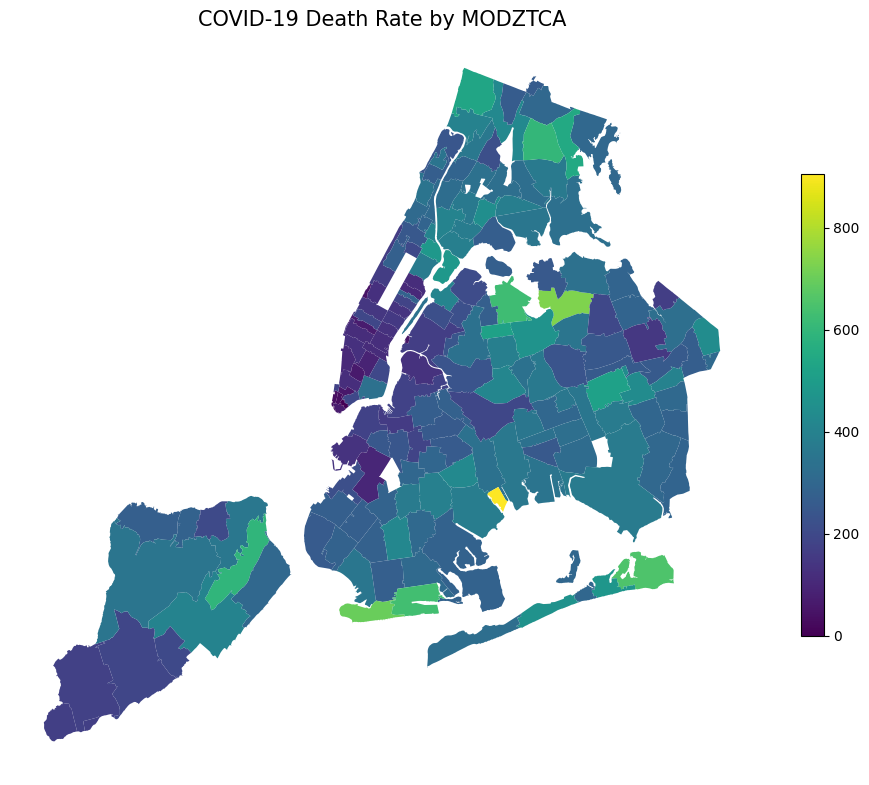

In [90]:
dr_ds = cr_gdf.plot(figsize=(12, 12), legend=True, legend_kwds={'shrink': 0.5},column='COVID_DEATH_RATE')
dr_ds.axis("off")
dr_ds.set_title('COVID-19 Death Rate by MODZTCA', fontdict={'fontsize': '15', 'fontweight' : '3'})

In [91]:
cr_gdf[['open_restaurant_count', 'POP_DENOMINATOR', 'COVID_CASE_RATE', 'COVID_DEATH_RATE']].describe().to_csv("descriptive_stats.csv")

In [92]:
import libpysal
w = libpysal.weights.Queen.from_dataframe(cr_gdf)

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
 There is 1 island with id: 37.
  warnings.warn(message)


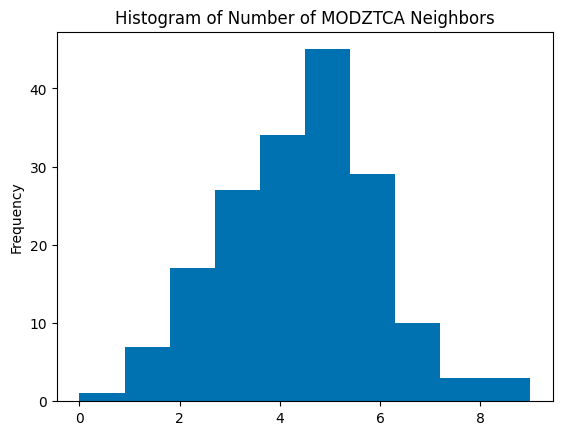

In [93]:
cardinalities = pd.Series(w.cardinalities)
cardinalities.plot(kind='hist', title='Histogram of Number of MODZTCA Neighbors');

In [94]:
from esda.moran import (Moran, Moran_Local)


In [95]:
mi = Moran(cr_gdf['COVID_CASE_RATE'], w)

('WARNING: ', 37, ' is an island (no neighbors)')


In [96]:
mi.I

0.7540583467685836

In [97]:
mi.p_sim

0.001

In [98]:
mi = Moran(cr_gdf['COVID_DEATH_RATE'], w)
print(mi.I)
mi.p_sim

0.4763046228662145


0.001

In [99]:
import spreg

In [100]:
# weighted OLS regression for covid case rates
target='COVID_CASE_RATE'
features=["open_restaurant_count"]

Y = cr_gdf[target].values.reshape(len(cr_gdf),1) #add dimension for spreg OLS DV
X = cr_gdf[features].values

In [101]:
Y.shape,cr_gdf[target].shape

((176, 1), (176,))

In [102]:
# with weights
ols=spreg.OLS(Y, X, w=w, \
                          name_y="COVID_CASE_RATE", name_x=["open_restaurant_count"],name_w="queen's continuity", \
                          nonspat_diag=True, #print stats
                          spat_diag=True,  #print Lagrange multiplier tests
                          moran=True)  # compute Moran’s I on the residuals
print(ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :queen's continuity
Dependent Variable  :COVID_CASE_RATE                Number of Observations:         176
Mean dependent var  :   8059.7364                Number of Variables   :           2
S.D. dependent var  :   2302.2191                Degrees of Freedom    :         174
R-squared           :      0.2140
Adjusted R-squared  :      0.2095
Sum squared residual:729064720.397                F-statistic           :     47.3678
Sigma-square        : 4190027.129                Prob(F-statistic)     :   1.023e-10
S.E. of regression  :    2046.956                Log likelihood        :   -1590.571
Sigma-square ML     : 4142413.184                Akaike info criterion :    3185.141
S.E of regression ML:   2035.2919                Schwarz criterion     :    3191.482

-------------------------------------------------------------------

In [103]:
target='COVID_DEATH_RATE'
features=["open_restaurant_count"]

Y = cr_gdf[target].values.reshape(len(cr_gdf),1) #add dimension for spreg OLS DV
X = cr_gdf[features].values

In [104]:
Y.shape,cr_gdf[target].shape

((176, 1), (176,))

In [105]:
# with weights
ols=spreg.OLS(Y, X, w=w, \
                          name_y="COVID_DEATH_RATE", name_x=["open_restaurant_count"],name_w="queen's continuity", \
                          nonspat_diag=True, #print stats
                          spat_diag=True,  #print Lagrange multiplier tests
                          moran=True)  # compute Moran’s I on the residuals
# print(slag.summary)

so it looks like we have a positive moran's i value that is statistically significant as well as both robust lag and error models having statistically significant coeficcient. according to anselin's flowchart, we next move on to the spatial lag

In [106]:
# now doing the spatial lag model
target='COVID_CASE_RATE'
features=["open_restaurant_count"]

Y = cr_gdf[target].values.reshape(len(cr_gdf),1) #add dimension for spreg OLS DV
X = cr_gdf[features].values

Y.shape,cr_gdf[target].shape

slag = spreg.ML_Lag(Y, X, w=w,  name_y="COVID_CASE_RATE", name_x=["open_restaurant_count"], name_w="queen's continuity")
print(slag.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :queen's continuity
Dependent Variable  :COVID_CASE_RATE                Number of Observations:         176
Mean dependent var  :   8059.7364                Number of Variables   :           3
S.D. dependent var  :   2302.2191                Degrees of Freedom    :         173
Pseudo R-squared    :      0.7482
Spatial Pseudo R-squared:  0.3540
Sigma-square ML     : 1377223.398                Log likelihood        :   -1511.393
S.E of regression   :    1173.552                Akaike info criterion :    3028.786
                                                 Schwarz criterion     :    3038.297

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
--------------------

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:892: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


In [107]:
target='COVID_DEATH_RATE'
features=["open_restaurant_count"]

Y = cr_gdf[target].values.reshape(len(cr_gdf),1) #add dimension for spreg OLS DV
X = cr_gdf[features].values

Y.shape,cr_gdf[target].shape

slag = spreg.ML_Lag(Y, X, w=w,  name_y="COVID_DEATH_RATE", name_x=["open_restaurant_count"], name_w="queen's continuity")
print(slag.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :queen's continuity
Dependent Variable  :COVID_DEATH_RATE                Number of Observations:         176
Mean dependent var  :    293.3459                Number of Variables   :           3
S.D. dependent var  :    139.2361                Degrees of Freedom    :         173
Pseudo R-squared    :      0.3864
Spatial Pseudo R-squared:  0.2000
Sigma-square ML     :   12041.603                Log likelihood        :   -1083.257
S.E of regression   :     109.734                Akaike info criterion :    2172.514
                                                 Schwarz criterion     :    2182.025

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-------------------

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:892: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


In [108]:
import seaborn                   # Graphics


# COVID-19 CASE RATE CLUSTERS

In [109]:
# !pip install ipympl


In [110]:
# %matplotlib inline


In [111]:
import plotly.express as px
from plotly.subplots import make_subplots


In [112]:
#COVID CASE RAATE LISA CLUSETRS
lisa_cr = Moran_Local(cr_gdf['COVID_CASE_RATE'], w)


/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


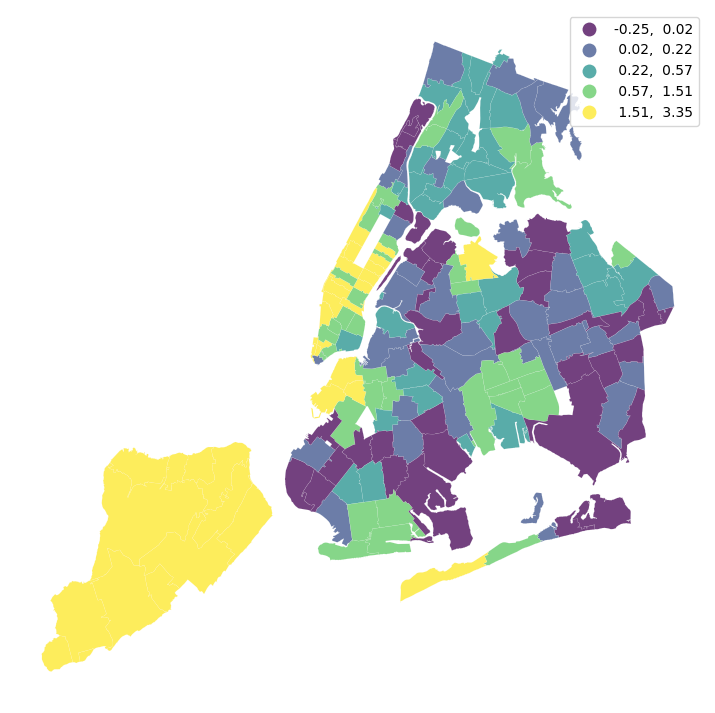

In [113]:
f, ax = plt.subplots(1, figsize=(9,9))
cr_gdf['covcr-Is'] = lisa_cr.Is
cr_gdf.plot(column='covcr-Is', cmap='viridis', scheme='quantiles',
        k=5, edgecolor='white', linewidth=0.1, alpha=0.75, legend=True,ax=ax);
ax.set_axis_off()

In [114]:
from matplotlib import colors


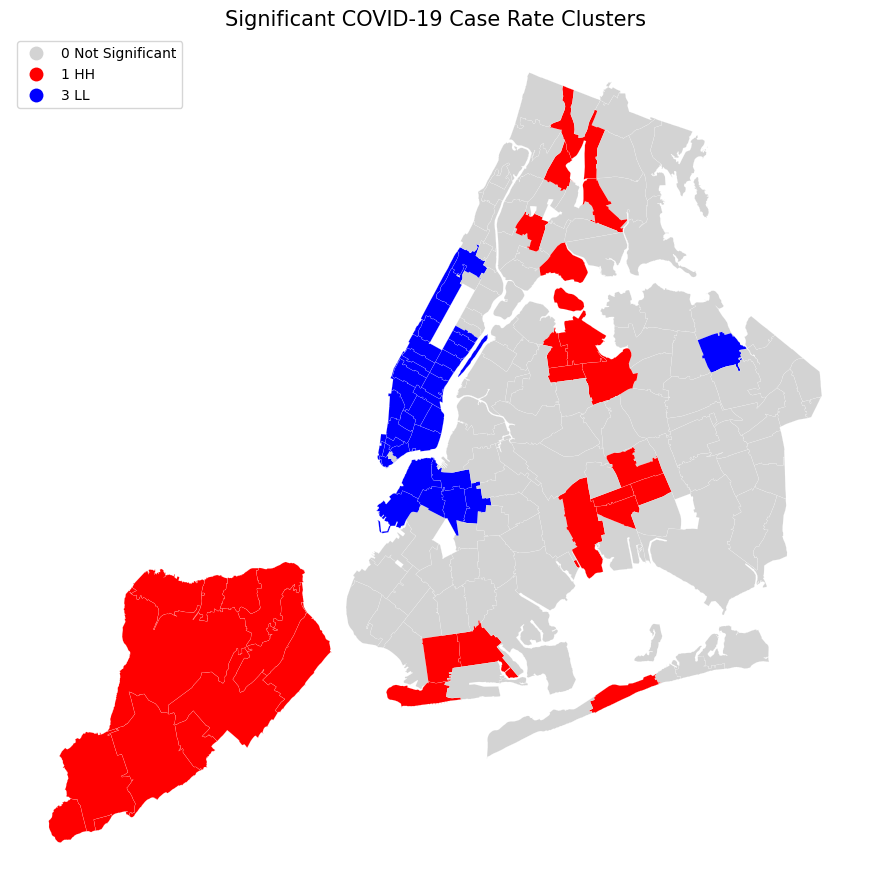

In [115]:
# Set up figure and axes
f, axs = plt.subplots(figsize=(11, 11))
# Make the axes accessible with single indexing
# axs = axs.flatten()

# ax = axs[0]
# q_labels = ['Q1', 'Q2', 'Q3', 'Q4']
# labels = [q_labels[i-1] for i in lisa_cr.q]
# hmap = colors.ListedColormap([ 'red', 'lightblue', 'blue', 'pink'])
# cr_gdf.assign(cl=labels).plot(column='cl', categorical=True, \
#         k=2, cmap=hmap, linewidth=0.1, ax=ax, \
#         edgecolor='white', legend=True, legend_kwds={"loc": 2})

# ax.set_axis_off()
# ax.set_title('COVID-19 Case Rate Clusters', fontdict={'fontsize': '15', 'fontweight' : '3'})

sig = 1 * (lisa_cr.p_sim < 0.05)



ax = axs
hotspot = 1 * (sig * lisa_cr.q==1)
coldspot = 3 * (sig * lisa_cr.q==3)
doughnut = 2 * (sig * lisa_cr.q==2)
diamond = 4 * (sig * lisa_cr.q==4)
spots = hotspot + coldspot + doughnut + diamond
spot_labels = [ '0 Not Significant', '1 HH', '2 LH', '3 LL', '4 HL']
labels = [spot_labels[i] for i in spots]
hmap = colors.ListedColormap([ 'lightgray', 'red', 'blue'])


cr_gdf.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True, legend_kwds={"loc": 2})

ax.set_axis_off()
ax.set_title('Significant COVID-19 Case Rate Clusters', fontdict={'fontsize': '15', 'fontweight' : '3'})


plt.show()

# COVID-19 DEATH RATE LISA CLUSTERS

In [116]:
lisa_dr = Moran_Local(cr_gdf['COVID_DEATH_RATE'], w)


/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


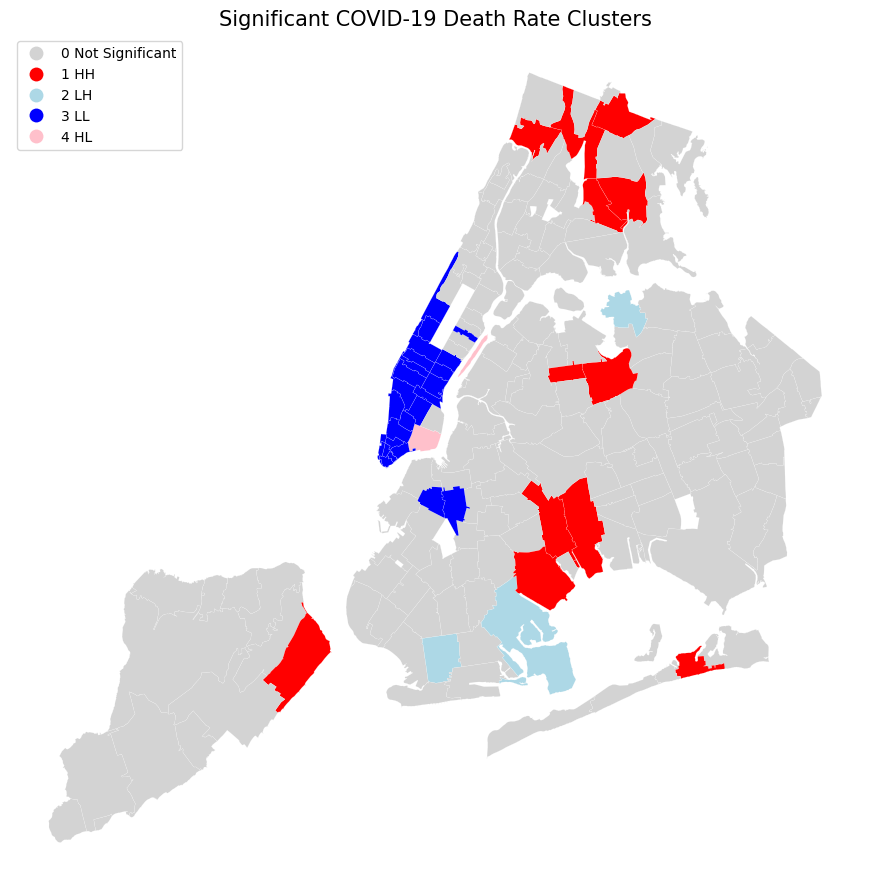

In [117]:
# Set up figure and axes
f, axs = plt.subplots(figsize=(11, 11))
# Make the axes accessible with single indexing
# axs = axs.flatten()

# ax = axs[0]
# q_labels = ['Q1', 'Q2', 'Q3', 'Q4']
# labels = [q_labels[i-1] for i in lisa_dr.q]
# hmap = colors.ListedColormap([ 'red', 'lightblue', 'blue', 'pink'])
# cr_gdf.assign(cl=labels).plot(column='cl', categorical=True, \
#         k=2, cmap=hmap, linewidth=0.1, ax=ax, \
#         edgecolor='white', legend=True, legend_kwds={"loc": 2})

# ax.set_axis_off()
# ax.set_title('COVID-19 Death Rate Clusters', fontdict={'fontsize': '15', 'fontweight' : '3'})

sig = 1 * (lisa_dr.p_sim < 0.05)



ax = axs
hotspot = 1 * (sig * lisa_dr.q==1)
coldspot = 3 * (sig * lisa_dr.q==3)
doughnut = 2 * (sig * lisa_dr.q==2)
diamond = 4 * (sig * lisa_dr.q==4)
spots = hotspot + coldspot + doughnut + diamond
spot_labels = [ '0 Not Significant', '1 HH', '2 LH', '3 LL', '4 HL']
labels = [spot_labels[i] for i in spots]
hmap = colors.ListedColormap(['lightgrey', 'red', 'lightblue', 'blue', 'pink'])


cr_gdf.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True, legend_kwds={"loc": 2})

ax.set_axis_off()
ax.set_title('Significant COVID-19 Death Rate Clusters', fontdict={'fontsize': '15', 'fontweight' : '3'})


plt.show()

In [118]:
# counts = [(j,(lisa.q==j).sum()) for j in range(1,5)]
# counts

In [119]:
# sig = 1 * (lisa.p_sim < 0.05)
# cr_gdf['covdr-p-sim'] = lisa.p_sim
# cr_gdf['covdr-sig'] = sig
# cr_gdf[['modzcta', 'covdr-sig','covdr-p-sim']].head()

In [120]:
# cr_gdf[['modzcta', 'covdr-sig','covdr-p-sim']].tail()


# RESTAURANT LISA CLUSTERS

In [121]:
#OPEN RESTAURANT COUNT LISA CLUSTEERS
lisa_opnr = Moran_Local(cr_gdf['open_restaurant_count'], w)


/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


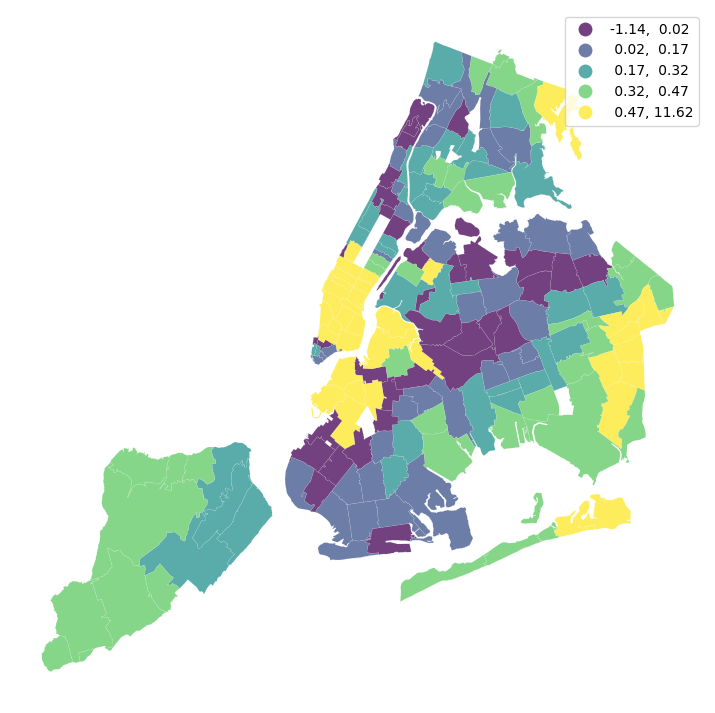

In [122]:
f, ax = plt.subplots(1, figsize=(9,9))
cr_gdf['opr-Is'] = lisa_opnr.Is
cr_gdf.plot(column='opr-Is', cmap='viridis', scheme='quantiles',
        k=5, edgecolor='white', linewidth=0.1, alpha=0.75, legend=True,ax=ax);
ax.set_axis_off()

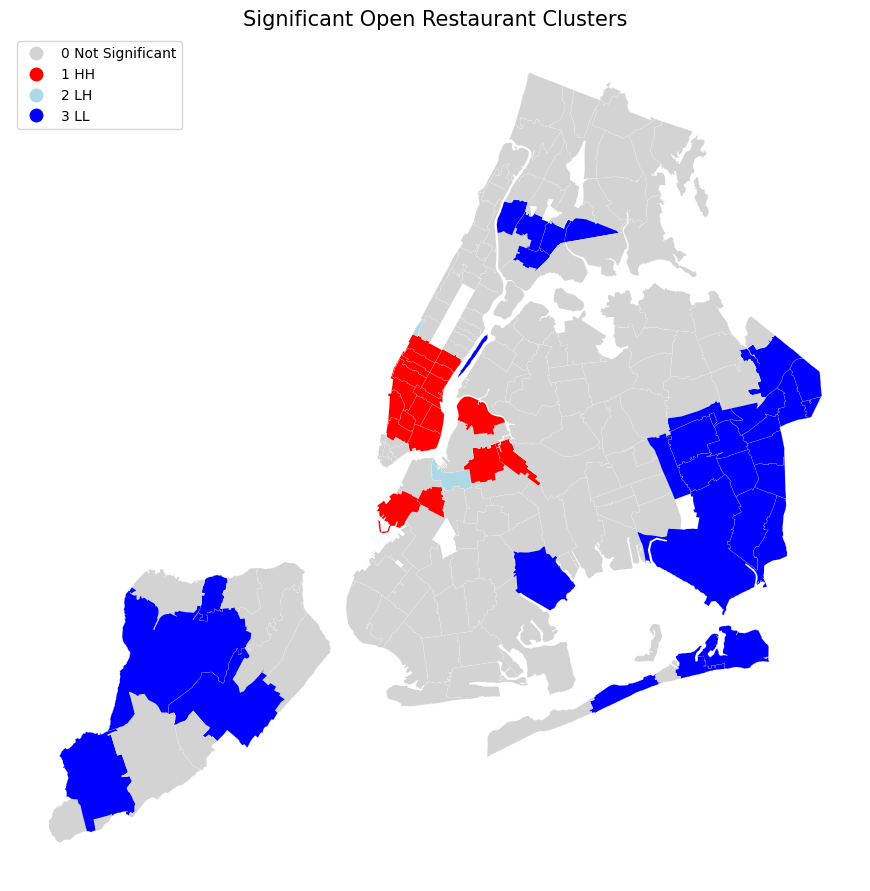

In [123]:
# Set up figure and axes
f, axs = plt.subplots(figsize=(11,11))
# Make the axes accessible with single indexing
# axs = axs.flatten()

# ax = axs[0]
# q_labels = ['Q1', 'Q2', 'Q3', 'Q4']
# labels = [q_labels[i-1] for i in lisa_opnr.q]
# hmap = colors.ListedColormap([ 'red', 'lightblue', 'blue', 'pink'])
# cr_gdf.assign(cl=labels).plot(column='cl', categorical=True, \
#         k=2, cmap=hmap, linewidth=0.1, ax=ax, \
#         edgecolor='white', legend=True, legend_kwds={"loc": 2})

# ax.set_axis_off()
# ax.set_title('Open Restaurant Clusters', fontdict={'fontsize': '15', 'fontweight' : '3'})

sig = 1 * (lisa_opnr.p_sim < 0.05)



ax = axs
hotspot = 1 * (sig * lisa_opnr.q==1)
coldspot = 3 * (sig * lisa_opnr.q==3)
doughnut = 2 * (sig * lisa_opnr.q==2)
diamond = 4 * (sig * lisa_opnr.q==4)
spots = hotspot + coldspot + doughnut + diamond
# spots
spot_labels = [  '0 Not Significant', '1 HH', '2 LH', '3 LL', '4 HL']
labels = [spot_labels[i] for i in spots]
# labels
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue'])


cr_gdf.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True, legend_kwds={"loc": 2})

ax.set_axis_off()
ax.set_title('Significant Open Restaurant Clusters', fontdict={'fontsize': '15', 'fontweight' : '3'})


plt.show()



# POPULATION LISA CLUSTERS



In [124]:
lisa_p = Moran_Local(cr_gdf['POP_DENOMINATOR'], w)


/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


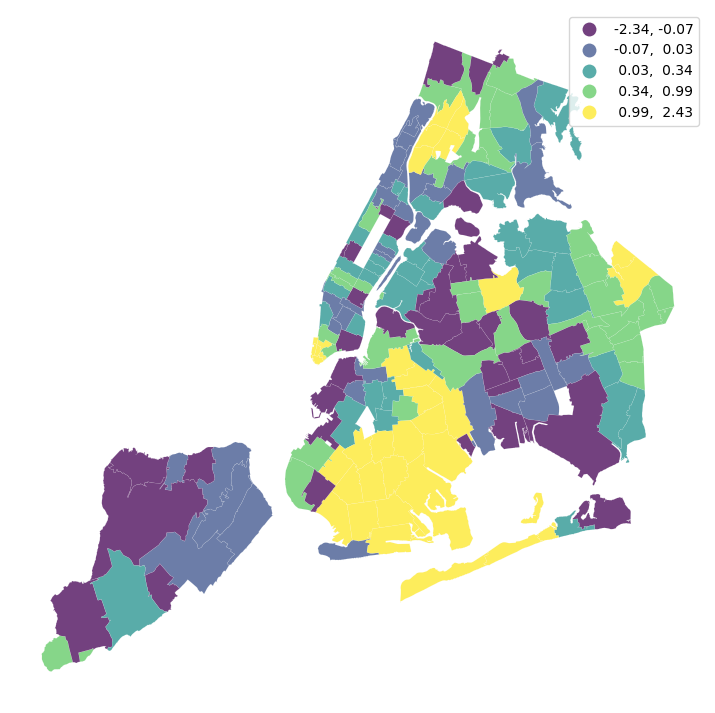

In [125]:
f, ax = plt.subplots(1, figsize=(9,9))
cr_gdf['opr-Is'] = lisa_p.Is
cr_gdf.plot(column='opr-Is', cmap='viridis', scheme='quantiles',
        k=5, edgecolor='white', linewidth=0.1, alpha=0.75, legend=True,ax=ax);
ax.set_axis_off()

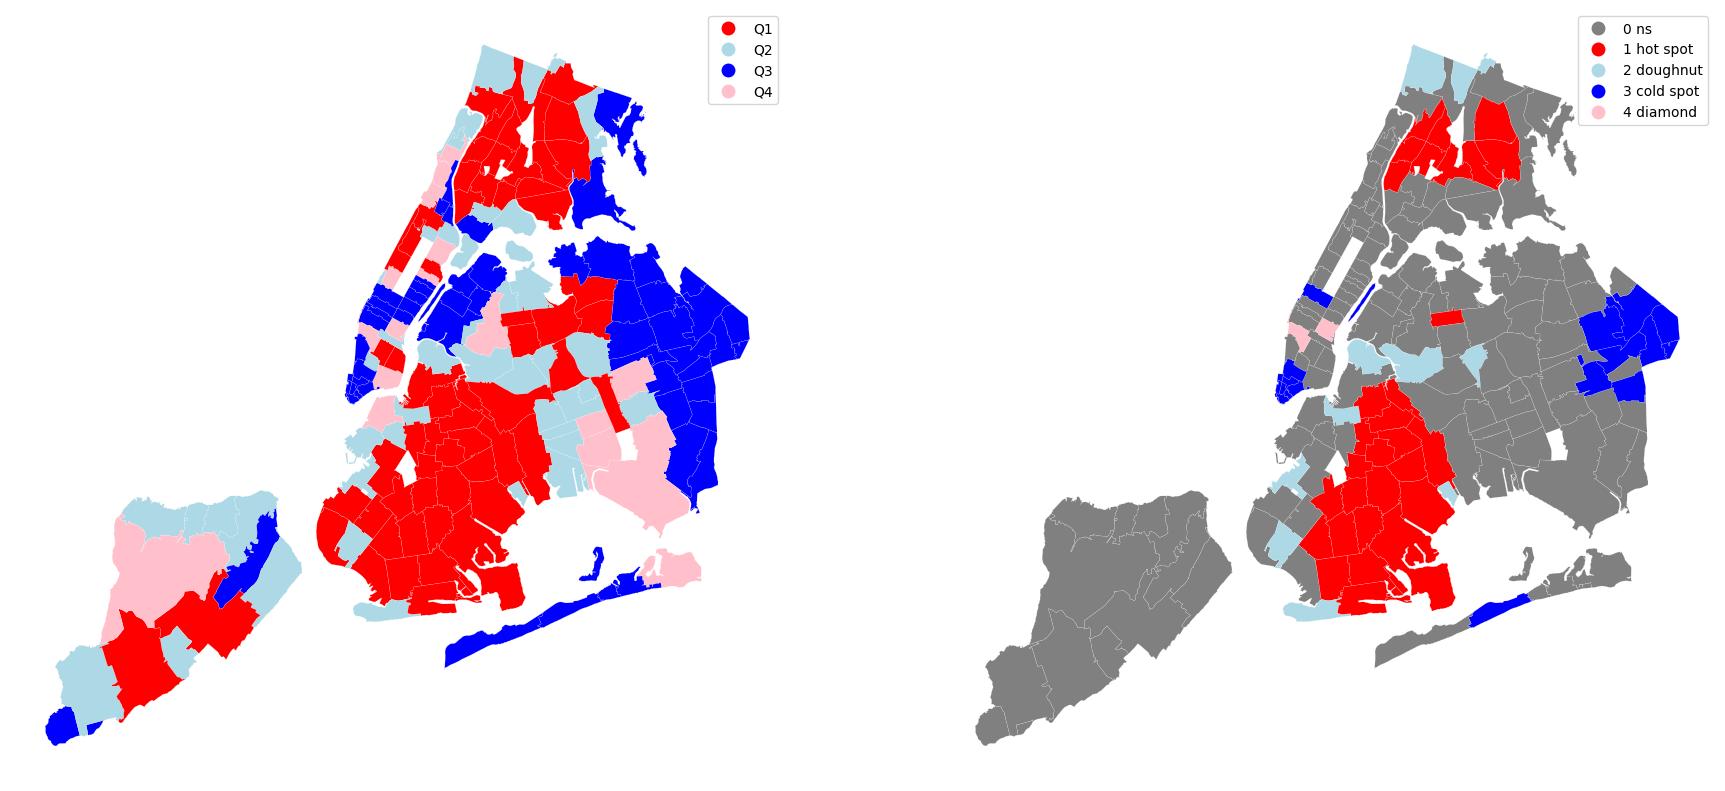

In [126]:
# Set up figure and axes
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(22, 22))
# Make the axes accessible with single indexing
# axs = axs.flatten()

ax = axs[0]
q_labels = ['Q1', 'Q2', 'Q3', 'Q4']
labels = [q_labels[i-1] for i in lisa_p.q]
hmap = colors.ListedColormap([ 'red', 'lightblue', 'blue', 'pink'])
cr_gdf.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)

# ax.set_aspect('equal')
ax.set_axis_off()

sig = 1 * (lisa_p.p_sim < 0.05)



ax = axs[1]
hotspot = 1 * (sig * lisa_p.q==1)
coldspot = 3 * (sig * lisa_p.q==3)
doughnut = 2 * (sig * lisa_p.q==2)
diamond = 4 * (sig * lisa_p.q==4)
spots = hotspot + coldspot + doughnut + diamond
# spots
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]
# labels
hmap = colors.ListedColormap([ 'grey', 'red', 'lightblue', 'blue', 'pink'])


cr_gdf.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)

# ax.set_aspect('equal')
ax.set_axis_off()


# plt.show()